<a href="https://colab.research.google.com/github/Safwan-2006/bmi-category-classification-ann/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Gold price prediction using Regression

In [15]:
import pandas as pd

# Load Gold Price Dataset (replace with your CSV path or URL)
url = "/content/financial_regression.csv"
df = pd.read_csv(url)

# Display first few rows
print(df.head())


         Date    Open    High     Low   Close     Volume
0  14-01-2010  114.49  115.14  114.42  114.93  115646960
1  15-01-2010  114.73  114.84  113.20  113.64  212252769
2  19-01-2010  113.62  115.13  113.59  115.06  138671890
3  20-01-2010  114.28  114.45  112.98  113.89  216330645
4  21-01-2010  113.92  114.27  111.56  111.70  344747028


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Absolute Error (MAE): 1.235
Mean Squared Error (MSE): 3.492
Root Mean Squared Error (RMSE): 1.869
R-squared (R²): 1.000


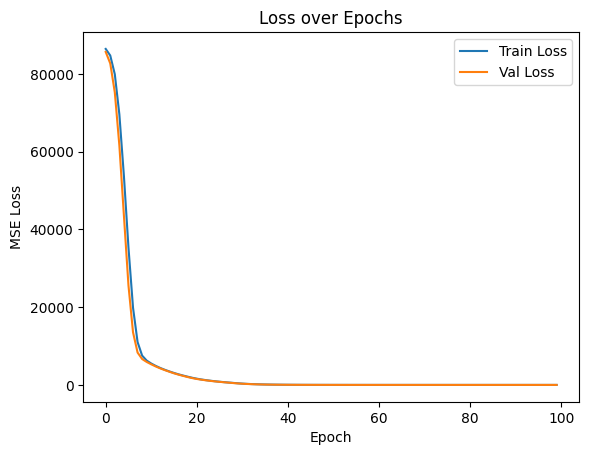

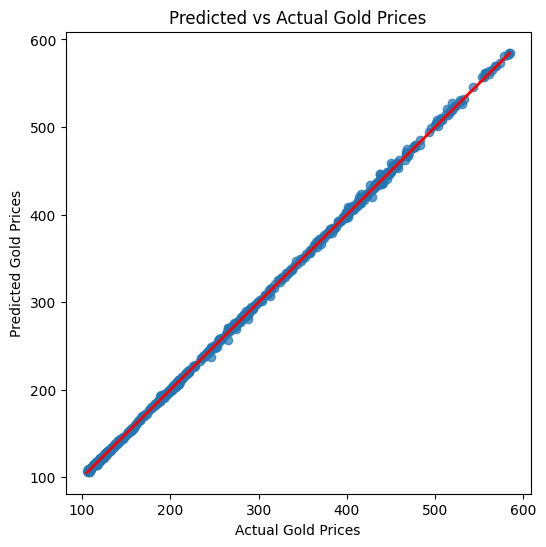


Model Architecture Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 677 (2.65 KB)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 452 (1.77 KB)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# -----------------------------
# Prepare data
# -----------------------------
# Features: Open, High, Low, Volume
# Target: Close
X = df[['Open', 'High', 'Low', 'Volume']].astype(float).values
y = df['Close'].astype(float).values

# Scale features
X = StandardScaler().fit_transform(X)

# -----------------------------
# Split into training and test sets
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# ANN Model
# -----------------------------
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(X.shape[1],)),  # Explicit Input layer
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])


model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

# -----------------------------
# Model predictions
# -----------------------------
y_pred = model.predict(X_test).flatten()

# -----------------------------
# Metrics
# -----------------------------
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R²): {r2:.3f}")

# -----------------------------
# Plot Loss over Epochs
# -----------------------------
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

# -----------------------------
# Plot Predicted vs Actual Prices
# -----------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Gold Prices")
plt.ylabel("Predicted Gold Prices")
plt.title("Predicted vs Actual Gold Prices")
plt.show()

# -----------------------------
# Show architecture summary
# -----------------------------
print("\nModel Architecture Summary:")
model.summary()


In [17]:
print("Number of training instances:", X_train.shape[0])
print("Number of test instances:", X_test.shape[0])


Number of training instances: 2975
Number of test instances: 744
